<a href="https://colab.research.google.com/github/dudasfig/congenital-syphilis-cases-/blob/main/Projeto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving attributes.csv to attributes.csv
Saving data_set.csv to data_set.csv


In [2]:
# Importações
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, make_scorer
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import OneHotEncoder

# Carregar os dados
attributes_file = 'attributes.csv'  # Substitua pelo caminho correto no Colab
data_file = 'data_set.csv'

attributes = pd.read_csv(attributes_file)
data = pd.read_csv(data_file)

# Exibindo as 5 primeiras linhas do dataset
print(data.head())

# Exibir informações gerais sobre o dataset
print(data.info())



   VDRL_RESULT  CONS_ALCOHOL  RH_FACTOR  SMOKER  PLAN_PREGNANCY  BLOOD_GROUP  \
0          1.0           1.0        0.0     1.0             1.0          1.0   
1          1.0           1.0        0.0     1.0             1.0          0.0   
2          1.0           1.0        2.0     1.0             1.0          4.0   
3          1.0           1.0        2.0     1.0             0.0          4.0   
4          1.0           1.0        0.0     1.0             1.0          1.0   

   HAS_PREG_RISK  TET_VACCINE  IS_HEAD_FAMILY  MARITAL_STATUS  ...  \
0            1.0          0.0             1.0             0.0  ...   
1            1.0          0.0             1.0             5.0  ...   
2            1.0          0.0             1.0             5.0  ...   
3            0.0          0.0             1.0             5.0  ...   
4            1.0          0.0             1.0             1.0  ...   

   HAS_FAM_INCOME  LEVEL_SCHOOLING  CONN_SEWER_NET  NUM_RES_HOUSEHOLD  \
0             0.0        

In [ ]:
data.head()

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0


In [ ]:
attributes.head()

,Attribute,Description,Type,Categorization
0,VDRL_RESULT,VDRL result,Binary,(i) Positive and (ii) Negative
1,CONS_ALCOHOL,Consume alcohol,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
2,RH_FACTOR,RH factor,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
3,SMOKER,Smoker,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
4,PLAN_PREGNANCY,Planned pregnancy,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."


In [5]:
# Remover entradas com valores negativos na idade
data = data[data['AGE'] >= 0]

# Preenchendo valores ausentes com a média para variáveis contínuas
data = data.fillna(data.mean())

# Verificando se ainda há valores ausentes
missing_values = data.isnull().sum()
print("\nValores ausentes após preenchimento:")
print(missing_values)

# Balanceamento das classes
target_classification = 'VDRL_RESULT'
X = data.drop(target_classification, axis=1)
y = data[target_classification]

smote_enn = SMOTEENN(random_state=42)
X_balanced, y_balanced = smote_enn.fit_resample(X, y)

# Exibindo distribuição das classes antes e depois do balanceamento
print("\nDistribuição Antes do Balanceamento:", Counter(y))
print("Distribuição Após Balanceamento:", Counter(y_balanced))



Valores ausentes após preenchimento:
VDRL_RESULT          0
CONS_ALCOHOL         0
RH_FACTOR            0
SMOKER               0
PLAN_PREGNANCY       0
BLOOD_GROUP          0
HAS_PREG_RISK        0
TET_VACCINE          0
IS_HEAD_FAMILY       0
MARITAL_STATUS       0
FOOD_INSECURITY      0
NUM_ABORTIONS        0
NUM_LIV_CHILDREN     0
NUM_PREGNANCIES      0
FAM_PLANNING         0
TYPE_HOUSE           0
HAS_FAM_INCOME       0
LEVEL_SCHOOLING      0
CONN_SEWER_NET       0
NUM_RES_HOUSEHOLD    0
HAS_FRU_TREE         0
HAS_VEG_GARDEN       0
FAM_INCOME           0
HOUSING_STATUS       0
WATER_TREATMENT      0
AGE                  0
dtype: int64

Distribuição Antes do Balanceamento: Counter({1.0: 40935, 0.0: 826})
Distribuição Após Balanceamento: Counter({0.0: 40841, 1.0: 33335})


In [4]:
# Critério para diferenciar colunas categóricas e contínuas
def process_columns(data, unique_threshold=10):
    continuous_columns = []
    categorical_columns = []

    for col in data.columns:
        if data[col].dtype in ["float64", "int64"]:
            # Considera contínua se o número de valores únicos for maior que o limite
            if data[col].nunique() > unique_threshold:
                continuous_columns.append(col)
            else:
                categorical_columns.append(col)
        else:
            categorical_columns.append(col)

    return continuous_columns, categorical_columns

# Identificar colunas categóricas e contínuas
continuous_columns, categorical_columns = process_columns(data)

print("Colunas contínuas:", continuous_columns)
print("Colunas categóricas:", categorical_columns)

# Aplicar One-Hot Encoding para as colunas categóricas
if categorical_columns:
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # Remove redundância
    encoded_data = pd.DataFrame(
        encoder.fit_transform(data[categorical_columns]),
        columns=encoder.get_feature_names_out(categorical_columns)
    )

    # Concatenar os dados codificados ao dataset original
    data_cleaned = data.drop(categorical_columns, axis=1)  # Remover as colunas categóricas originais
    data_encoded = pd.concat([data_cleaned, encoded_data], axis=1)
else:
    # Caso não existam colunas categóricas, não realizar nenhuma modificação
    data_encoded = data.copy()

print("\nFormato do dataset após tratamento e One-Hot Encoding:")
print(data_encoded.head())


Colunas contínuas: ['AGE']
Colunas categóricas: ['VDRL_RESULT', 'CONS_ALCOHOL', 'RH_FACTOR', 'SMOKER', 'PLAN_PREGNANCY', 'BLOOD_GROUP', 'HAS_PREG_RISK', 'TET_VACCINE', 'IS_HEAD_FAMILY', 'MARITAL_STATUS', 'FOOD_INSECURITY', 'NUM_ABORTIONS', 'NUM_LIV_CHILDREN', 'NUM_PREGNANCIES', 'FAM_PLANNING', 'TYPE_HOUSE', 'HAS_FAM_INCOME', 'LEVEL_SCHOOLING', 'CONN_SEWER_NET', 'NUM_RES_HOUSEHOLD', 'HAS_FRU_TREE', 'HAS_VEG_GARDEN', 'FAM_INCOME', 'HOUSING_STATUS', 'WATER_TREATMENT']

Formato do dataset após tratamento e One-Hot Encoding:
    AGE  VDRL_RESULT_1.0  CONS_ALCOHOL_1.0  CONS_ALCOHOL_2.0  RH_FACTOR_1.0  \
0  25.0              1.0               1.0               0.0            0.0   
1  25.0              1.0               1.0               0.0            0.0   
2  24.0              1.0               1.0               0.0            0.0   
3  28.0              1.0               1.0               0.0            0.0   
4  27.0              1.0               1.0               0.0            0.0   


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

# Dividir os dados balanceados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# Hiperparâmetros para Random Forest Classifier (versão reduzida)
param_dist = {
    'n_estimators': [50, 100],  # Reduzimos os valores para acelerar o processo
    'max_depth': [5, 10, None],  # Reduzimos as opções
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Configurar RandomizedSearchCV com Random Forest
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    cv=StratifiedKFold(n_splits=3),  # Reduzido para 3 folds para maior velocidade
    scoring='f1_macro',
    n_iter=10,  # Definido para 10 iterações aleatórias
    n_jobs=-1,
    random_state=42
)

# Treinar o modelo com validação cruzada e ajuste de hiperparâmetros
random_search.fit(X_train, y_train)

# Extrair e avaliar o melhor modelo
best_rf_classifier = random_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

# Exibir melhores hiperparâmetros e relatório de classificação
print("Melhores hiperparâmetros para Random Forest (Classificação):", random_search.best_params_)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhores hiperparâmetros para Random Forest (Classificação): {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      8179
         1.0       0.98      1.00      0.99      6657

    accuracy                           0.99     14836
   macro avg       0.99      0.99      0.99     14836
weighted avg       0.99      0.99      0.99     14836



In [ ]:
# Hiperparâmetros para Decision Tree Classifier
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV para Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=StratifiedKFold(n_splits=5), scoring='f1_macro', n_jobs=-1)

# Treinar modelo com validação cruzada e ajuste de hiperparâmetros
grid_search_dt.fit(X_train, y_train)

# Melhor modelo encontrado
best_dt_classifier = grid_search_dt.best_estimator_

print("\nMelhores hiperparâmetros para Decision Tree (Classificação):")
print(grid_search_dt.best_params_)

# Avaliação no conjunto de teste
y_pred_dt = best_dt_classifier.predict(X_test)
print("\nRelatório de Classificação (Decision Tree):")
print(classification_report(y_test, y_pred_dt))


Melhores hiperparâmetros para Decision Tree (Classificação):
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

Relatório de Classificação (Decision Tree):
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      8179
         1.0       0.97      0.98      0.98      6657

    accuracy                           0.98     14836
   macro avg       0.98      0.98      0.98     14836
weighted avg       0.98      0.98      0.98     14836



In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Variável de Regressão
target_regression = 'AGE'
X_regression = data.drop(target_regression, axis=1)
y_regression = data[target_regression]

# Divisão em treino e teste
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

# Hiperparâmetros para Random Forest Regressor (versão reduzida)
param_dist_reg = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Configurar RandomizedSearchCV com Random Forest Regressor
random_search_reg = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist_reg,
    cv=KFold(n_splits=3),  # Reduzido para 3 folds
    scoring='neg_mean_absolute_error',
    n_iter=10,  # 10 iterações aleatórias
    n_jobs=-1,
    random_state=42
)

# Treinar o modelo com validação cruzada e ajuste de hiperparâmetros
random_search_reg.fit(X_train_reg, y_train_reg)

# Extrair e avaliar o melhor modelo
best_rf_regressor = random_search_reg.best_estimator_
y_pred_reg = best_rf_regressor.predict(X_test_reg)

# Métricas de avaliação
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

# Exibir melhores hiperparâmetros e desempenho
print("Melhores hiperparâmetros para Random Forest (Regressão):", random_search_reg.best_params_)
print("\nDesempenho no conjunto de teste (Random Forest Regressão):")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


Melhores hiperparâmetros para Random Forest (Regressão): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}

Desempenho no conjunto de teste (Random Forest Regressão):
MAE: 2.85
MSE: 17.29
RMSE: 4.16


In [18]:
# Importância das variáveis
importances = pd.Series(rf_regressor.feature_importances_, index=X_train_reg.columns)
print("\nImportância das variáveis:")
print(importances.sort_values(ascending=False))


Importância das variáveis:
LEVEL_SCHOOLING      0.088866
NUM_PREGNANCIES      0.066661
FAM_INCOME           0.057349
NUM_RES_HOUSEHOLD    0.057317
BLOOD_GROUP          0.056715
WATER_TREATMENT      0.056126
FOOD_INSECURITY      0.050304
MARITAL_STATUS       0.047315
HOUSING_STATUS       0.046881
NUM_ABORTIONS        0.044483
FAM_PLANNING         0.041069
PLAN_PREGNANCY       0.040379
NUM_LIV_CHILDREN     0.040284
HAS_PREG_RISK        0.038684
IS_HEAD_FAMILY       0.038321
CONN_SEWER_NET       0.037828
HAS_FRU_TREE         0.033358
HAS_FAM_INCOME       0.026790
HAS_VEG_GARDEN       0.026387
RH_FACTOR            0.022922
TYPE_HOUSE           0.020334
TET_VACCINE          0.019144
CONS_ALCOHOL         0.018425
SMOKER               0.017691
VDRL_RESULT          0.006366
dtype: float64


In [12]:
print("Valores reais (y_test_reg):")
print(y_test_reg.head(10))  # Exibe os primeiros 10 valores reais

print("\nValores previstos (y_pred_reg):")
print(y_pred_reg[:10])  # Exibe os primeiros 10 valores previstos

# Estatísticas dos valores reais
print("\nEstatísticas dos valores reais (y_test_reg):")
print(y_test_reg.describe())

# Estatísticas dos valores previstos
print("\nEstatísticas dos valores previstos (y_pred_reg):")
print(pd.Series(y_pred_reg).describe())

Valores reais (y_test_reg):
38698    25.0
33891    25.0
26208    32.0
20941    20.0
24550    19.0
23421    17.0
34852    25.0
20521    25.0
22379    29.0
41689    25.0
Name: AGE, dtype: float64

Valores previstos (y_pred_reg):
[23.31179713 30.60243552 26.84336286 23.12889006 23.72915897 22.23142399
 24.62137424 24.99839538 25.73897979 23.60787649]

Estatísticas dos valores reais (y_test_reg):
count    8353.000000
mean       25.204477
std         4.563656
min         0.000000
25%        25.000000
50%        25.000000
75%        25.000000
max        50.000000
Name: AGE, dtype: float64

Estatísticas dos valores previstos (y_pred_reg):
count    8353.000000
mean       25.188598
std         1.810393
min        18.966998
25%        24.006299
50%        25.042184
75%        26.182649
max        36.063746
dtype: float64



Top 10 Variáveis mais importantes (Classificação):
FOOD_INSECURITY      0.128050
PLAN_PREGNANCY       0.122996
FAM_PLANNING         0.086217
HOUSING_STATUS       0.083886
CONN_SEWER_NET       0.069598
HAS_FRU_TREE         0.056760
LEVEL_SCHOOLING      0.054962
NUM_RES_HOUSEHOLD    0.038372
IS_HEAD_FAMILY       0.033061
WATER_TREATMENT      0.032152
dtype: float64


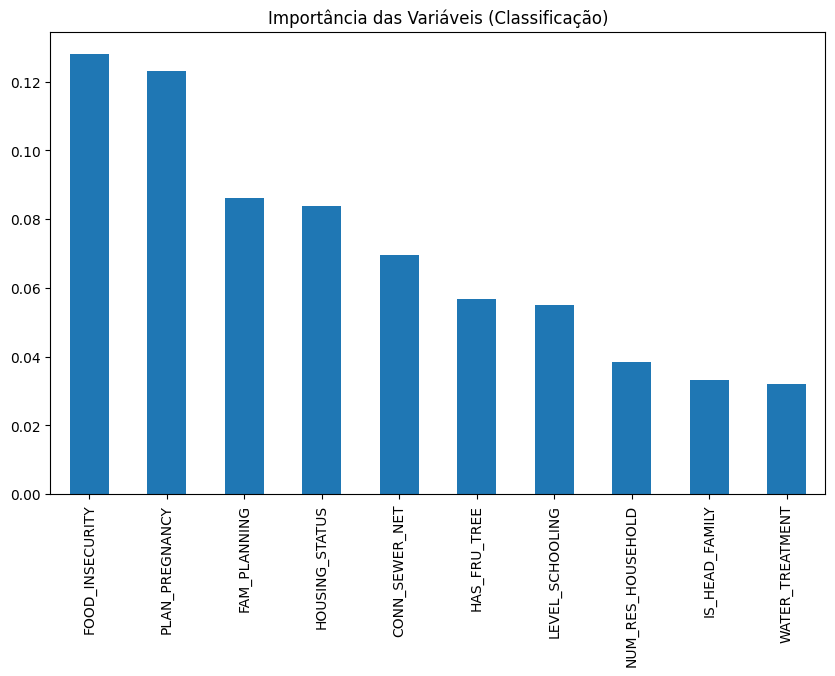


Top 10 Variáveis mais importantes (Regressão):
NUM_PREGNANCIES      0.187538
LEVEL_SCHOOLING      0.164427
NUM_LIV_CHILDREN     0.095413
MARITAL_STATUS       0.070380
NUM_RES_HOUSEHOLD    0.045836
HAS_PREG_RISK        0.035680
WATER_TREATMENT      0.034762
FAM_INCOME           0.033815
FOOD_INSECURITY      0.029465
HOUSING_STATUS       0.028891
dtype: float64


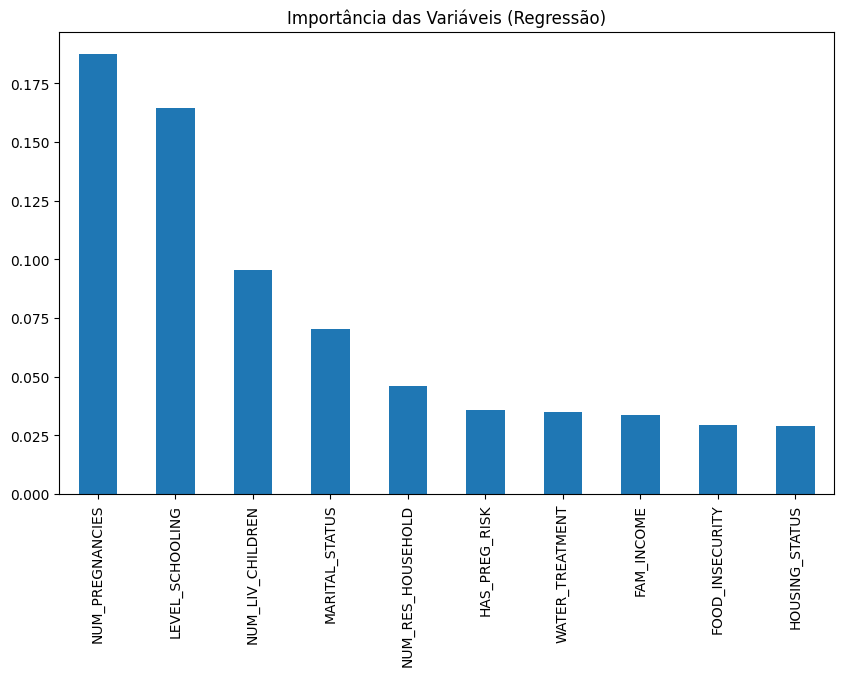

In [ ]:
# Importância de variáveis para classificação
feature_importance_class = pd.Series(
    best_rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nTop 10 Variáveis mais importantes (Classificação):")
print(feature_importance_class.head(10))

feature_importance_class.head(10).plot(kind='bar', figsize=(10, 6), title='Importância das Variáveis (Classificação)')
plt.show()

# Importância de variáveis para regressão
feature_importance_reg = pd.Series(
    best_rf_regressor.feature_importances_, index=X_regression.columns).sort_values(ascending=False)

print("\nTop 10 Variáveis mais importantes (Regressão):")
print(feature_importance_reg.head(10))

feature_importance_reg.head(10).plot(kind='bar', figsize=(10, 6), title='Importância das Variáveis (Regressão)')
plt.show()


<ipython-input-9-61ed4f535033>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_balanced, palette="viridis")


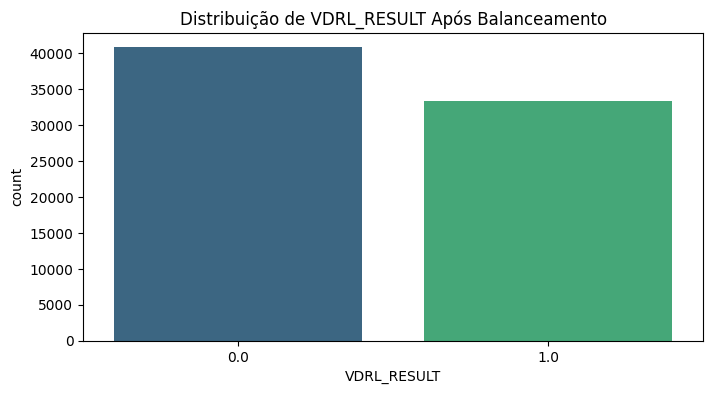

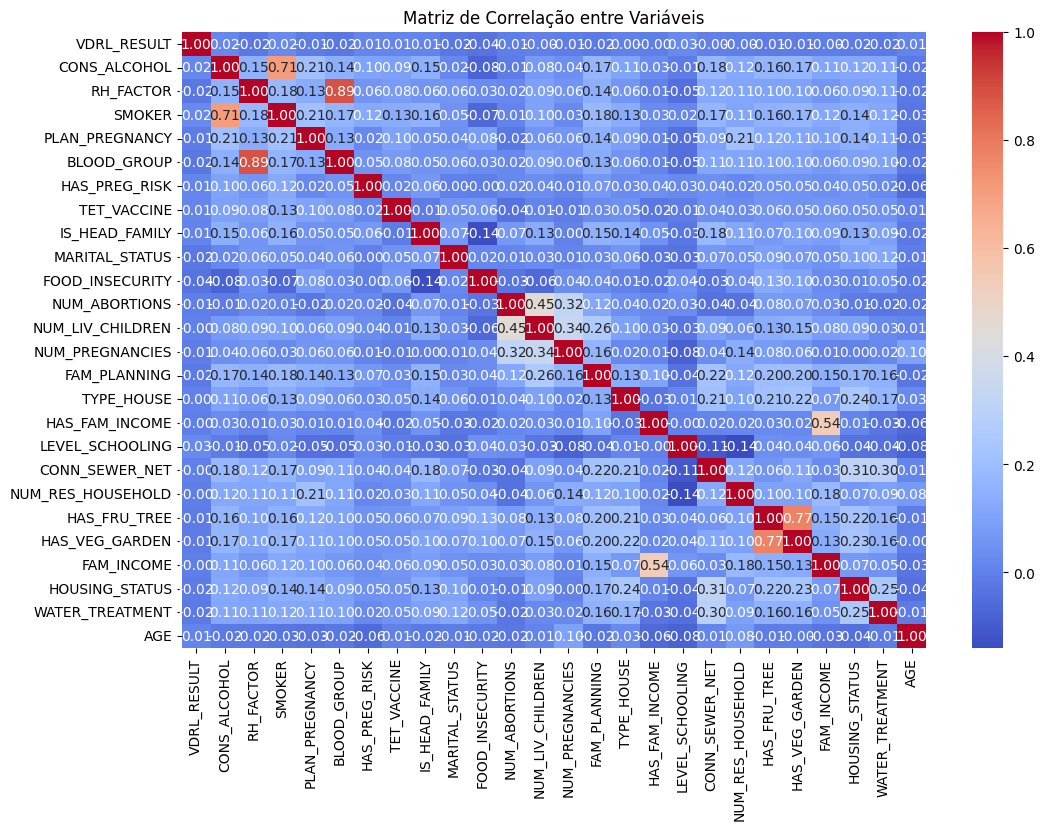


Correlação com AGE:
AGE                  1.000000
NUM_PREGNANCIES      0.100206
NUM_RES_HOUSEHOLD    0.076153
TYPE_HOUSE           0.027122
CONN_SEWER_NET       0.014522
VDRL_RESULT          0.008182
NUM_LIV_CHILDREN     0.008035
TET_VACCINE          0.006589
HAS_VEG_GARDEN      -0.002214
HAS_FRU_TREE        -0.007589
Name: AGE, dtype: float64


In [ ]:
# Análise exploratória e visualização da distribuição das variáveis contínuas
import seaborn as sns

# Distribuição da variável-alvo (VDRL_RESULT)
plt.figure(figsize=(8, 4))
sns.countplot(x=y_balanced, palette="viridis")
plt.title("Distribuição de VDRL_RESULT Após Balanceamento")
plt.show()

# Análise de correlação
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

# Variáveis mais correlacionadas com a idade (AGE)
correlation_with_age = correlation_matrix["AGE"].sort_values(ascending=False)
print("\nCorrelação com AGE:")
print(correlation_with_age.head(10))


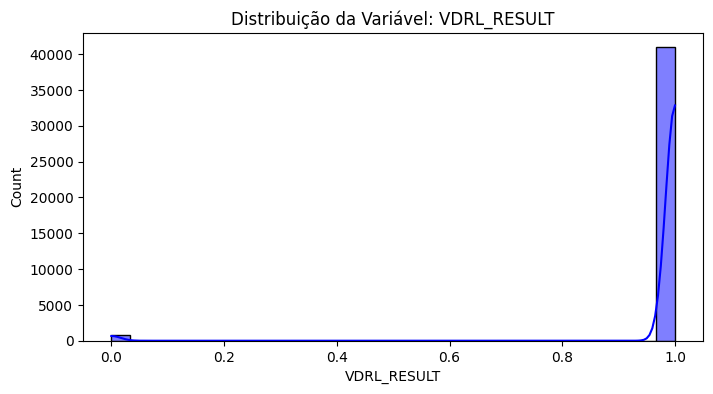

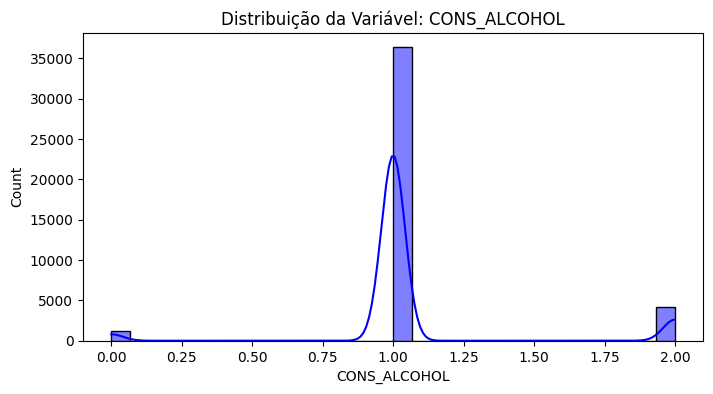

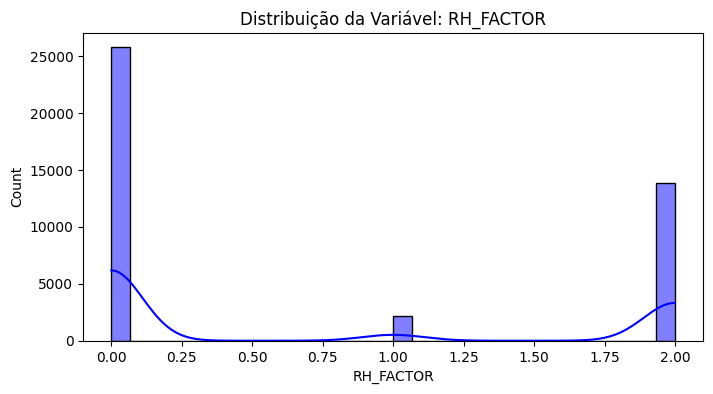

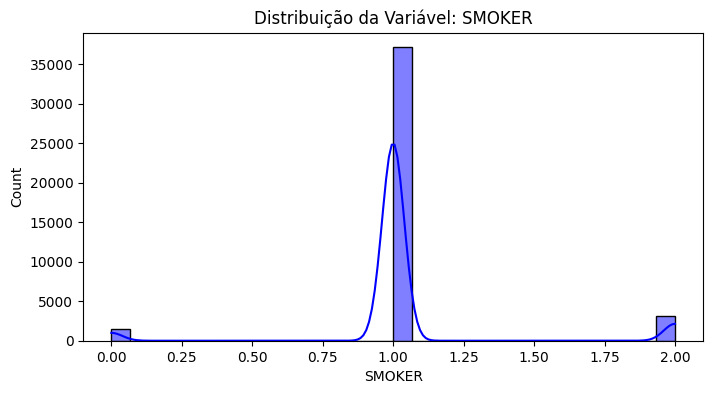

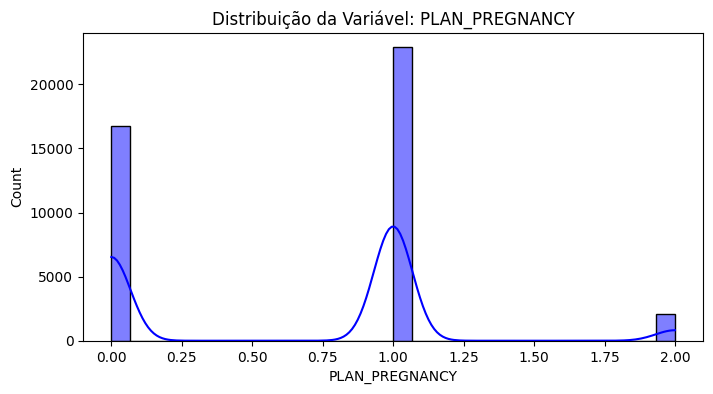

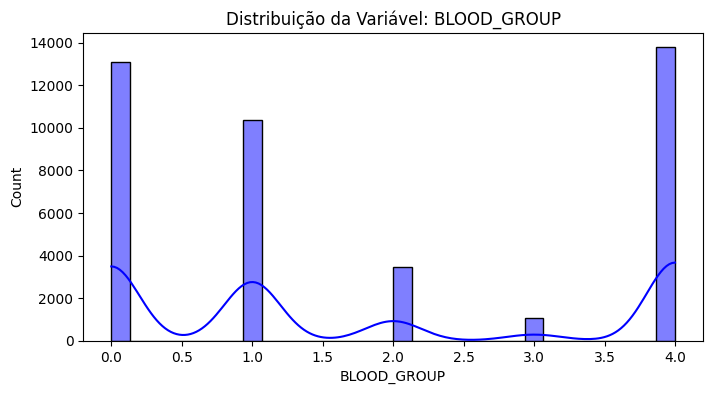

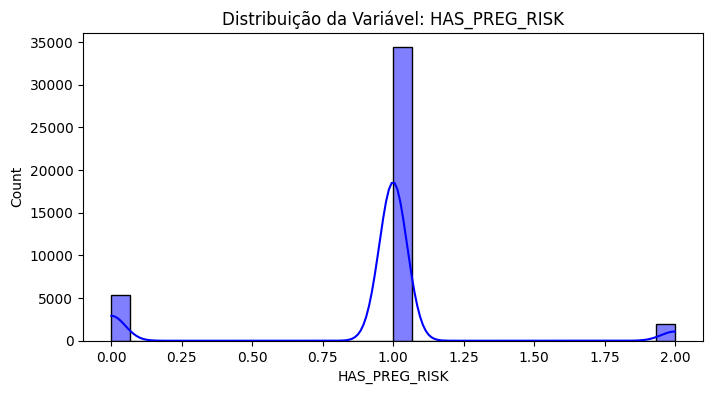

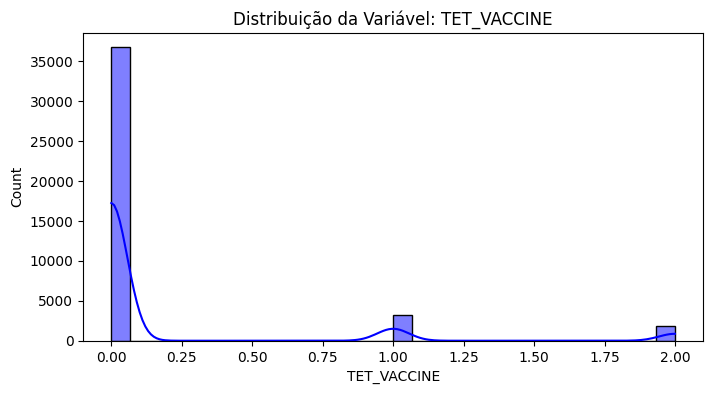

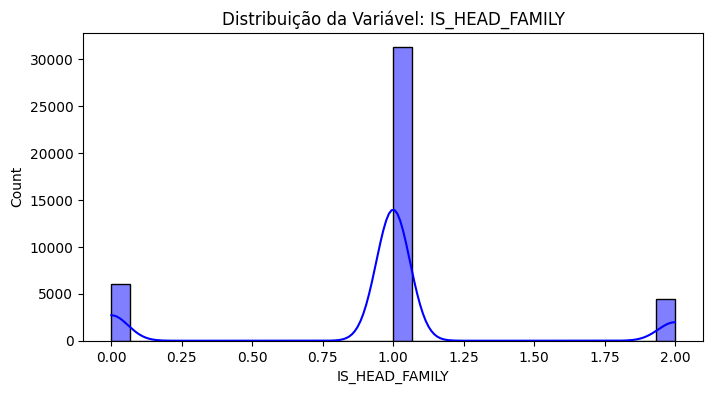

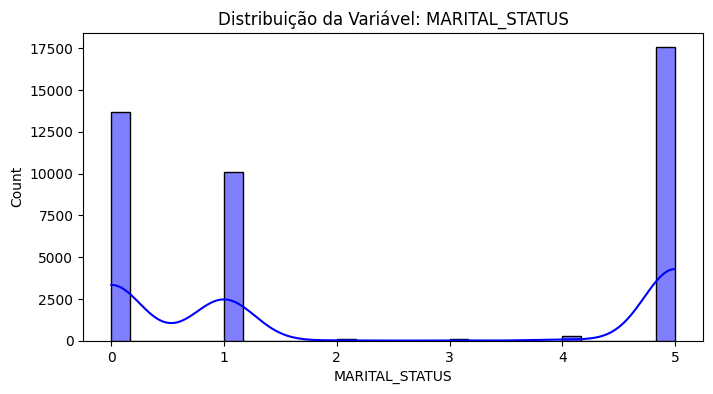

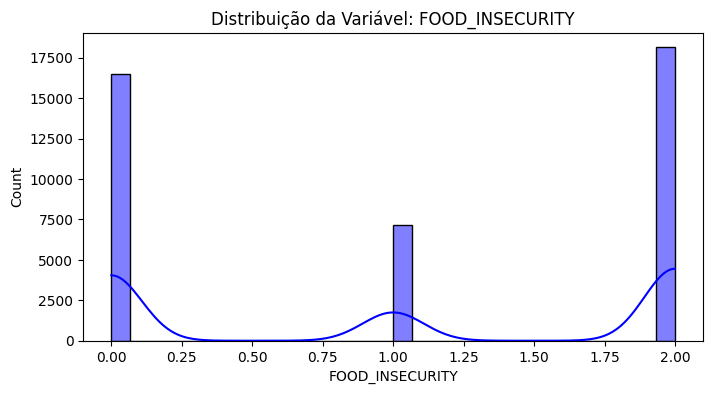

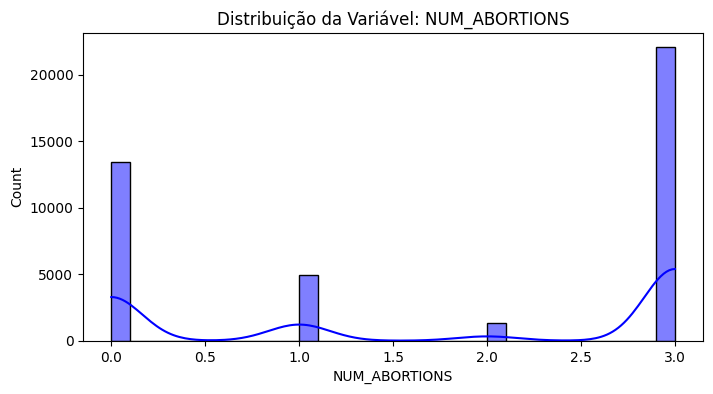

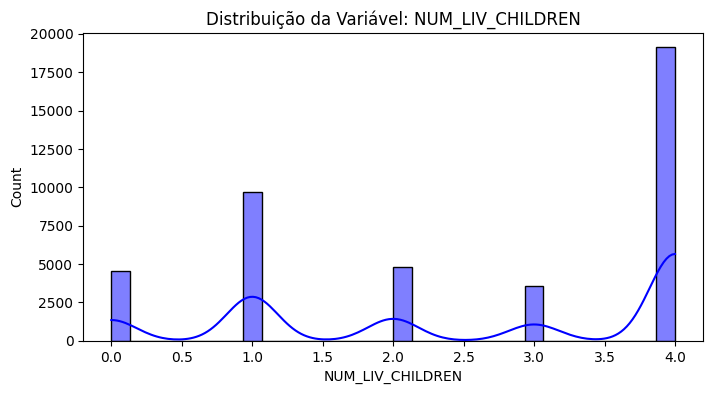

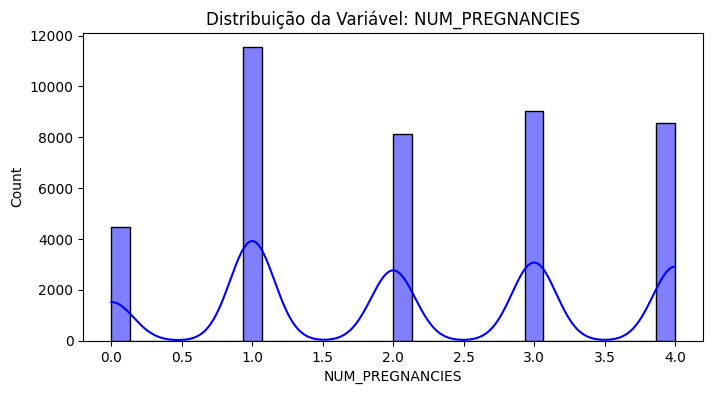

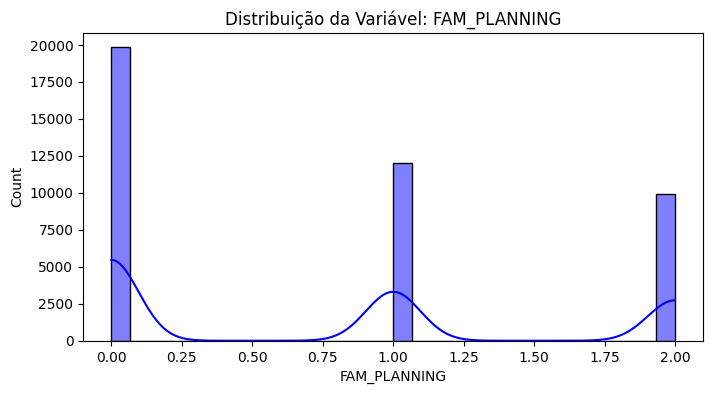

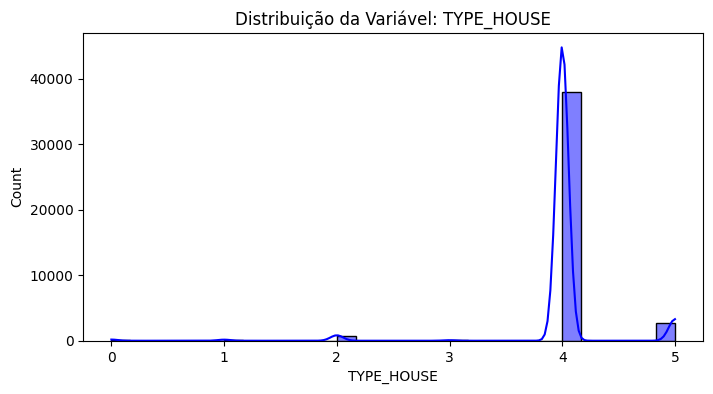

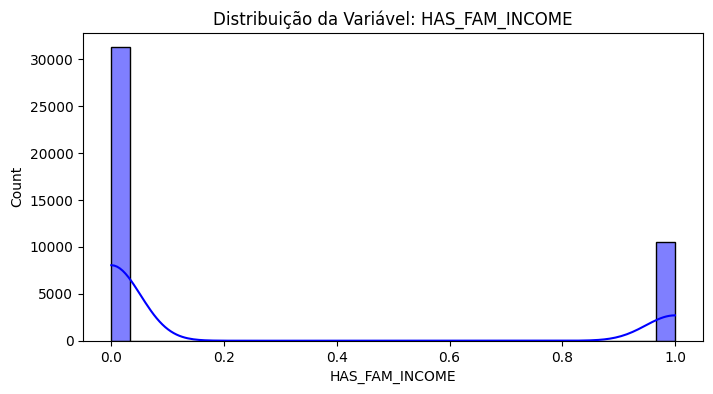

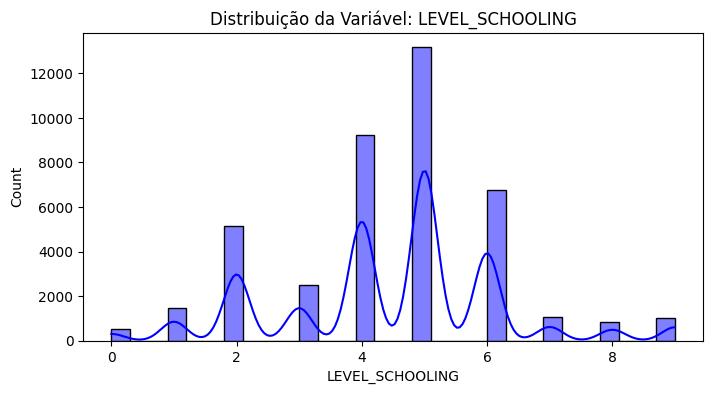

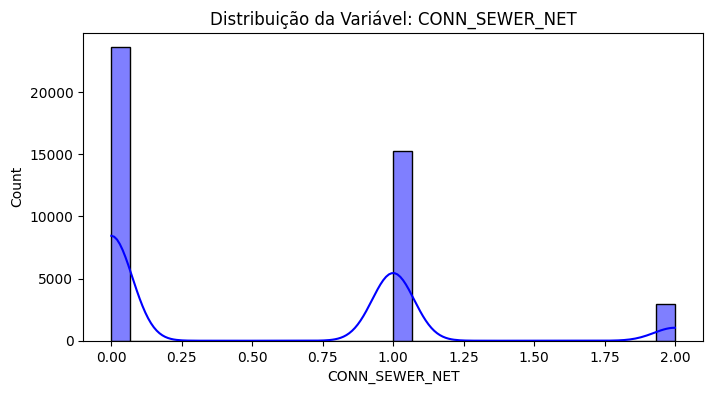

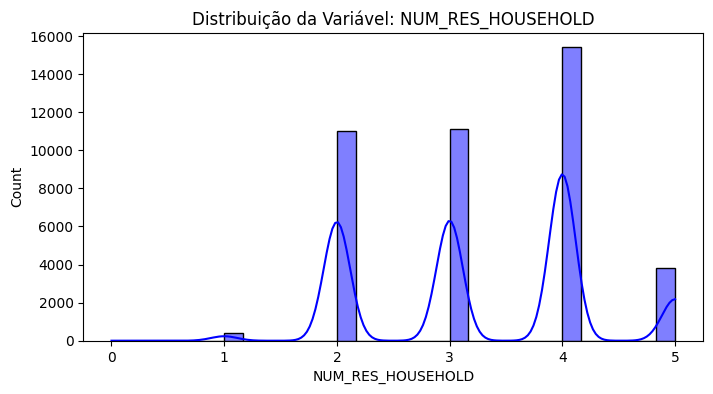

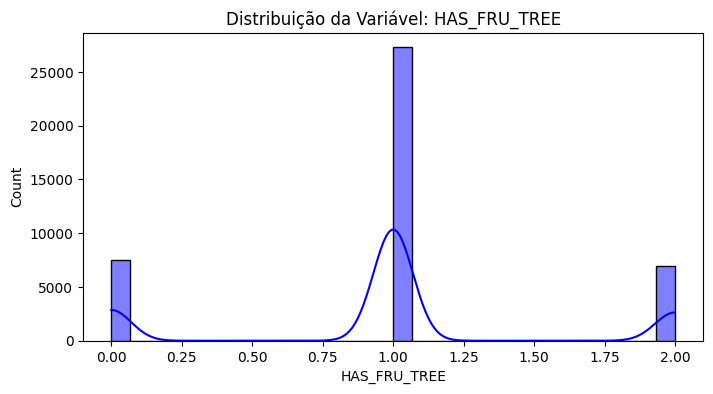

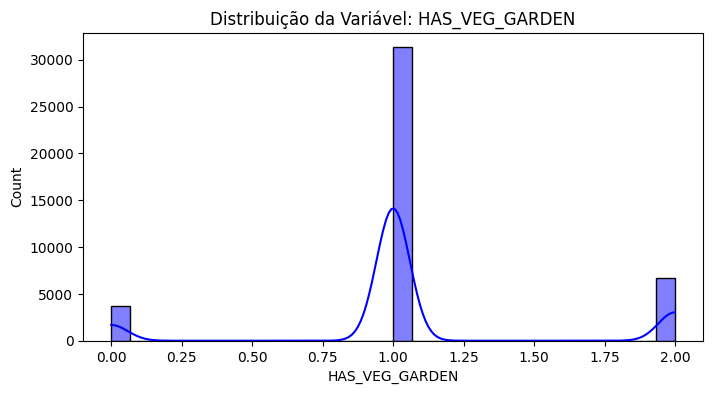

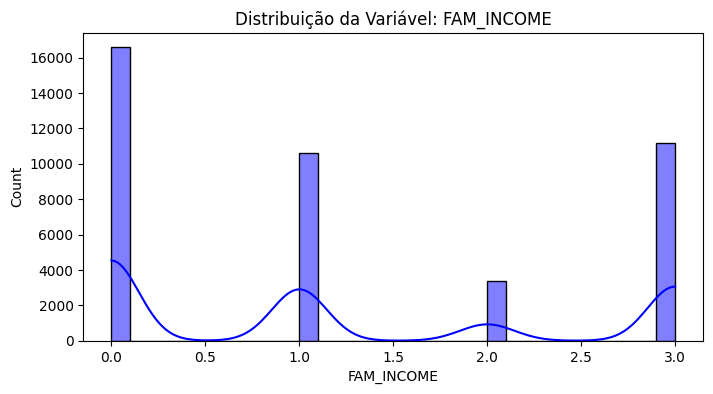

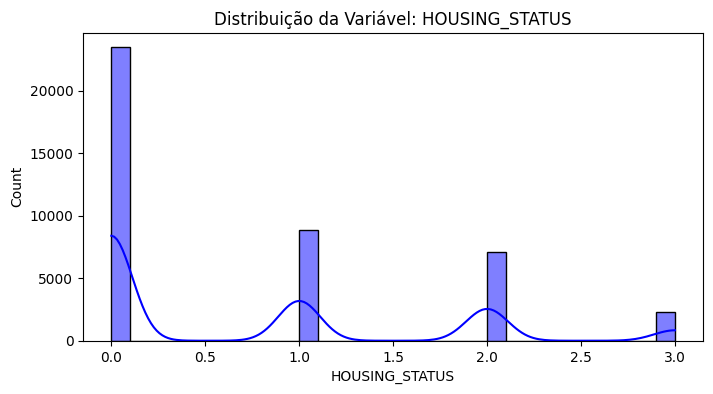

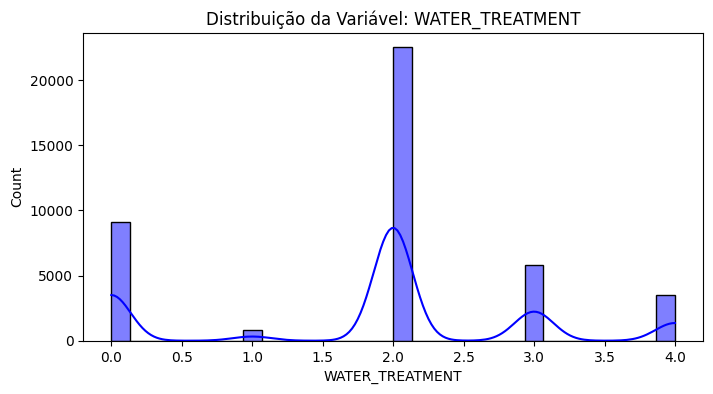

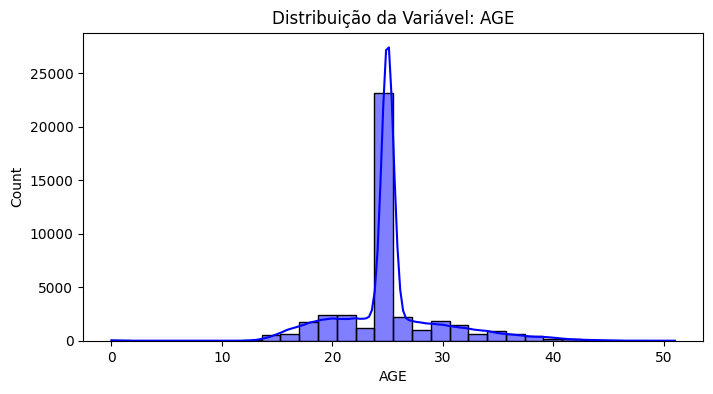

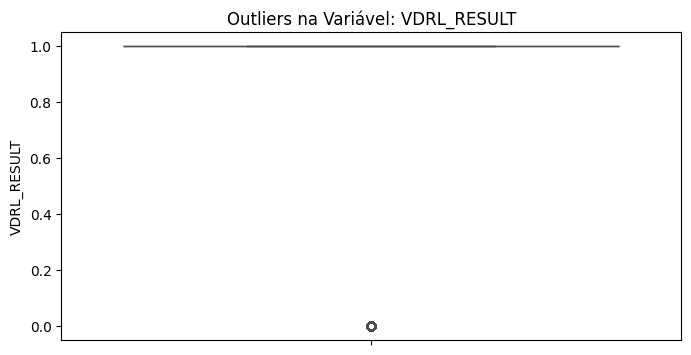

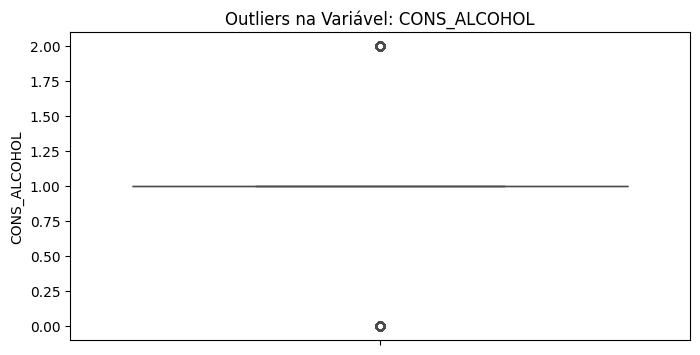

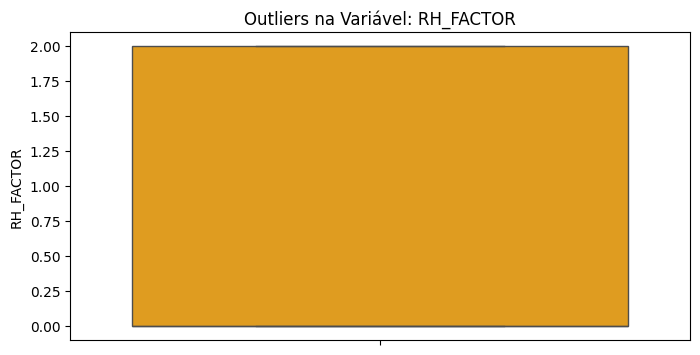

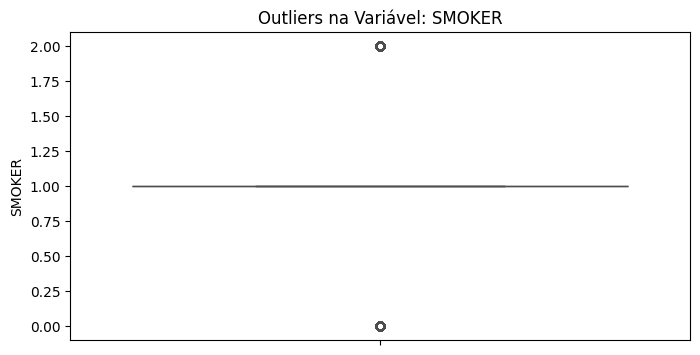

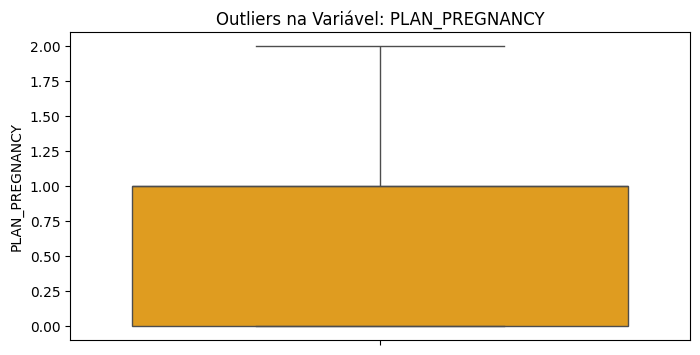

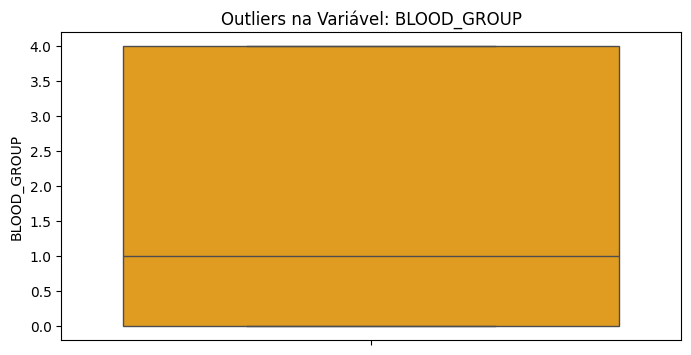

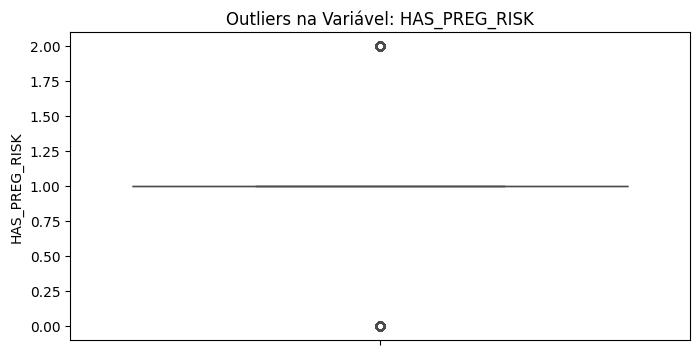

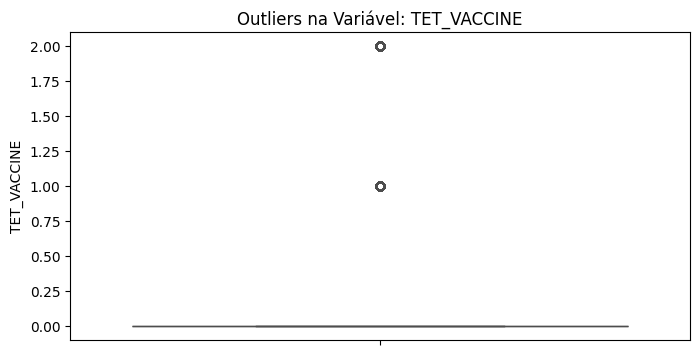

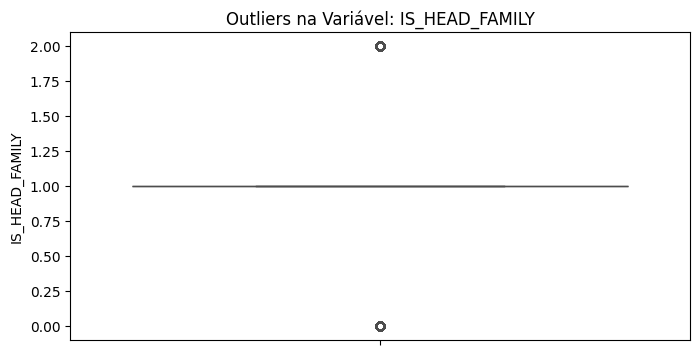

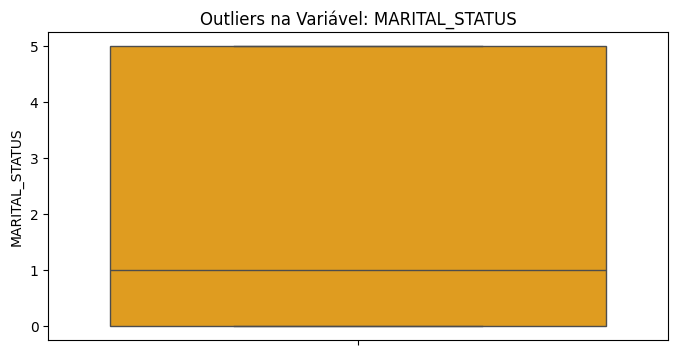

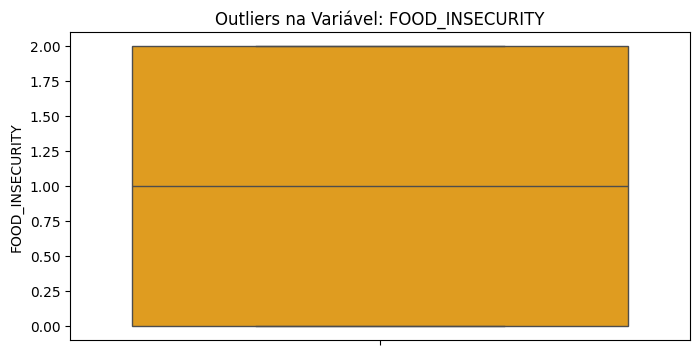

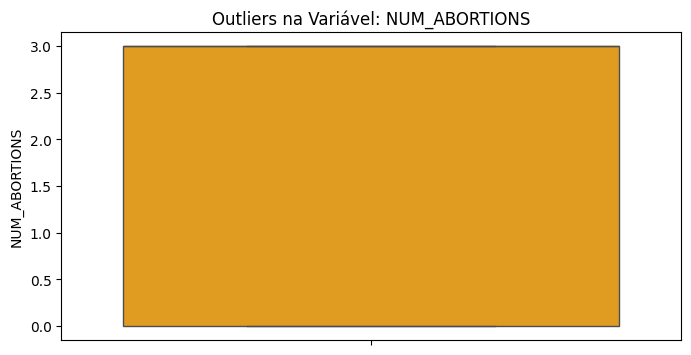

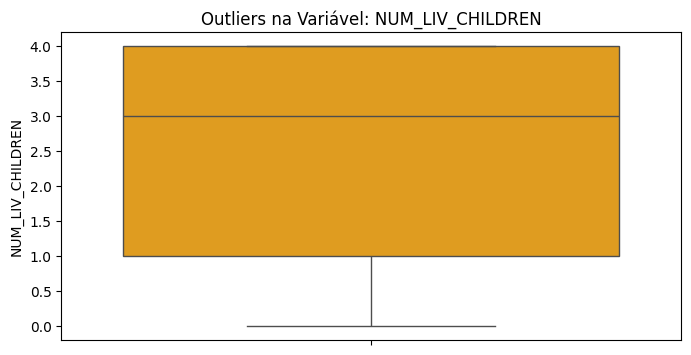

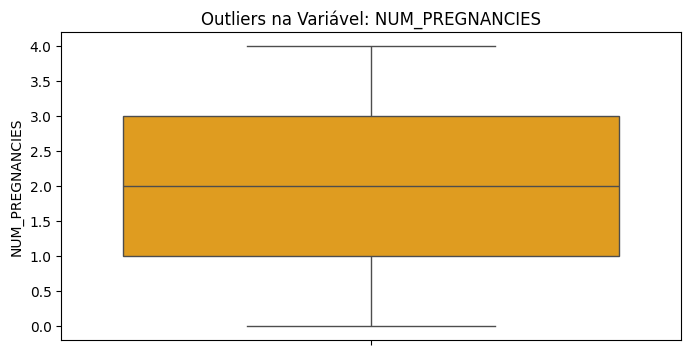

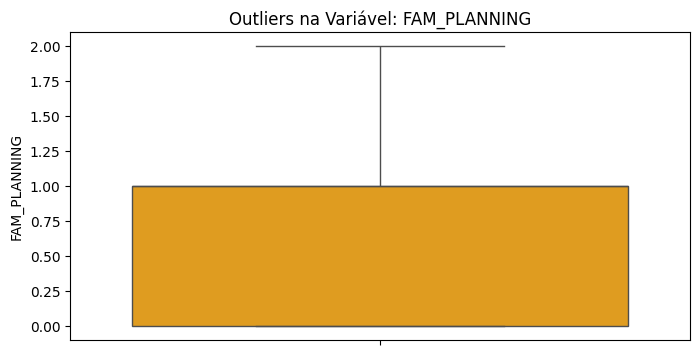

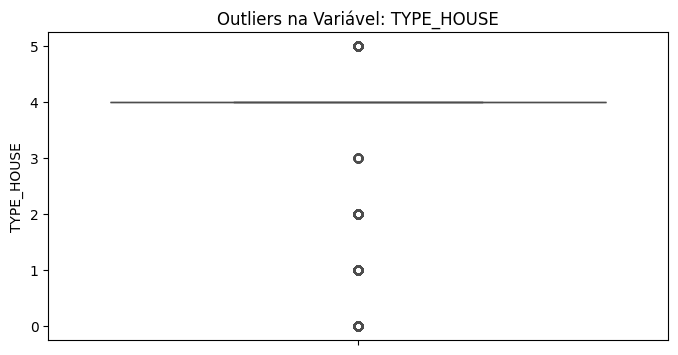

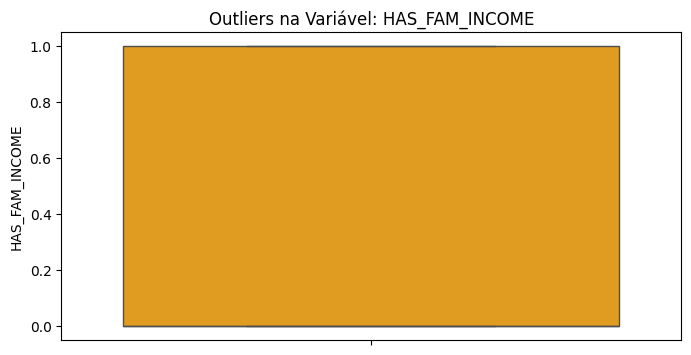

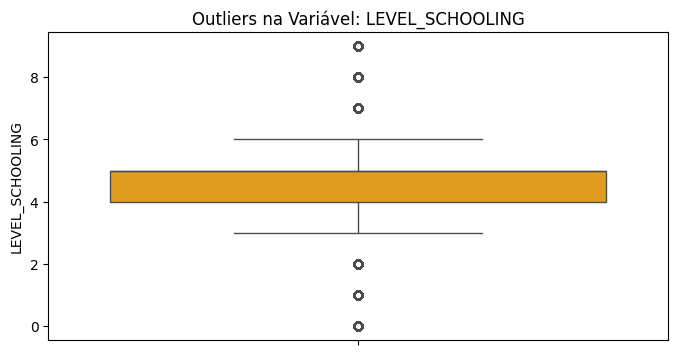

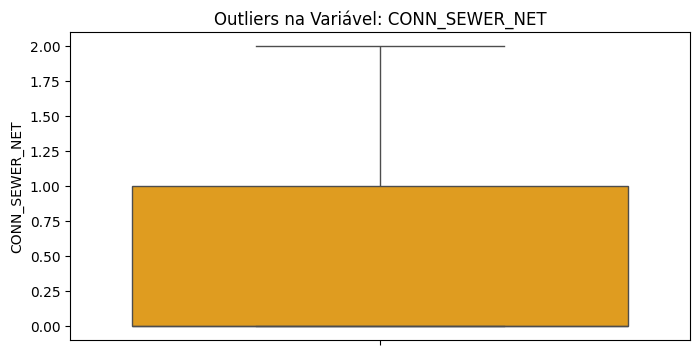

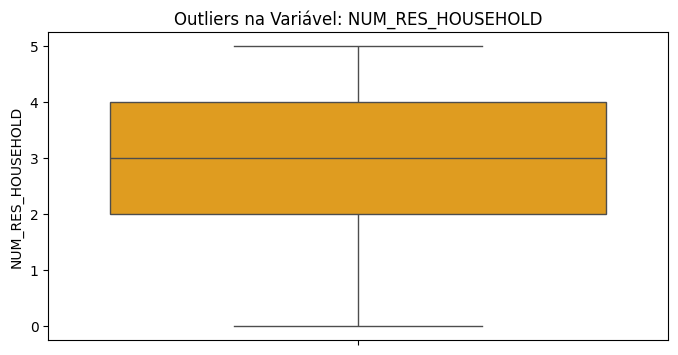

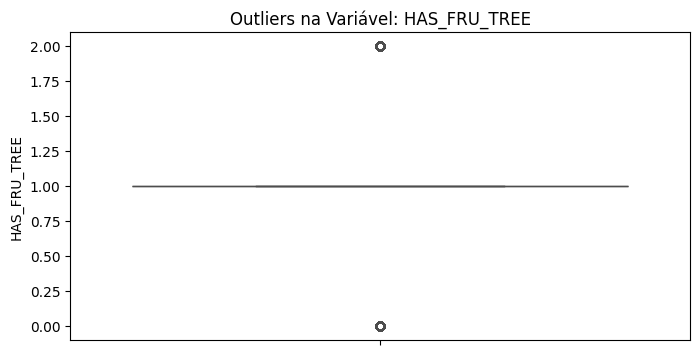

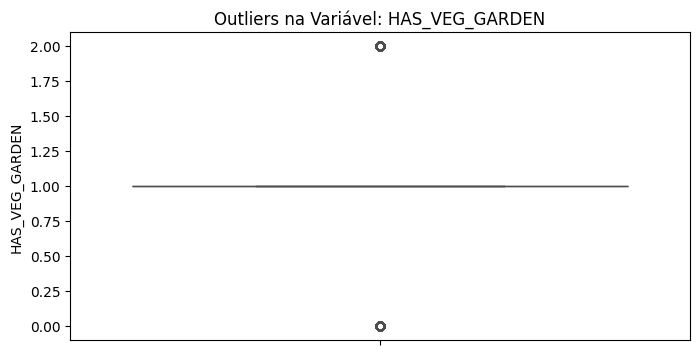

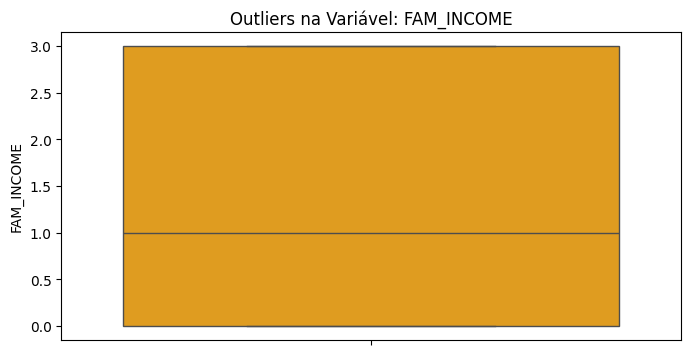

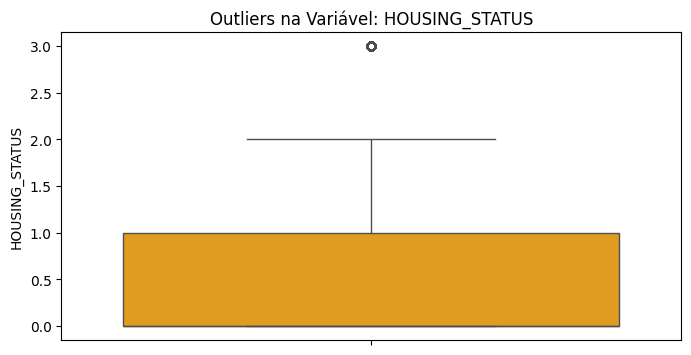

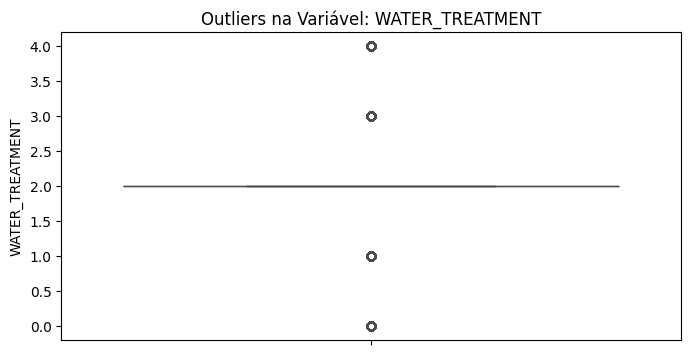

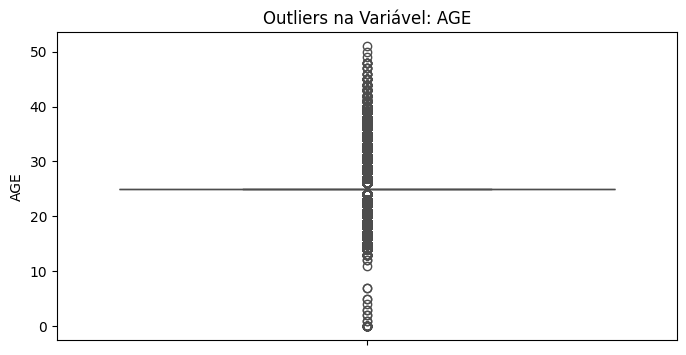

In [ ]:
# Visualizar distribuições das variáveis contínuas
continuous_columns = data.select_dtypes(include=["float64", "int64"]).columns

for col in continuous_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribuição da Variável: {col}")
    plt.show()

# Detecção de outliers usando Boxplots
for col in continuous_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col], color="orange")
    plt.title(f"Outliers na Variável: {col}")
    plt.show()


In [ ]:
# Identificar fatores mais influentes para o resultado de sífilis congênita
top_factors_class = feature_importance_class.head(10)

print("\nPrincipais Fatores Associados à Sífilis Congênita (VDRL_RESULT):")
print(top_factors_class)

# Discussão sobre fatores preventivos
prevention_factors = {
    "Fatores Sociodemográficos": ["Renda", "Educação", "Acesso à Saúde"],
    "Fatores Clínicos": ["Histórico de Doenças", "Exames Pré-natais", "Uso de Medicamentos"]
}

print("\nSugestões de Prevenção:")
for category, factors in prevention_factors.items():
    print(f"{category}: {', '.join(factors)}")



Principais Fatores Associados à Sífilis Congênita (VDRL_RESULT):
FOOD_INSECURITY      0.128050
PLAN_PREGNANCY       0.122996
FAM_PLANNING         0.086217
HOUSING_STATUS       0.083886
CONN_SEWER_NET       0.069598
HAS_FRU_TREE         0.056760
LEVEL_SCHOOLING      0.054962
NUM_RES_HOUSEHOLD    0.038372
IS_HEAD_FAMILY       0.033061
WATER_TREATMENT      0.032152
dtype: float64

Sugestões de Prevenção:
Fatores Sociodemográficos: Renda, Educação, Acesso à Saúde
Fatores Clínicos: Histórico de Doenças, Exames Pré-natais, Uso de Medicamentos


In [ ]:
discussion = """
Os modelos demonstram que fatores como renda, educação e acesso à saúde estão diretamente
associados aos desfechos de sífilis congênita. Intervenções como campanhas educativas,
melhoria no atendimento pré-natal e aumento da cobertura de exames podem reduzir a incidência.

Além disso, o papel de políticas públicas para aumentar o acesso aos serviços de saúde é crucial.
Recomenda-se que os resultados obtidos sejam integrados a discussões entre gestores de saúde
e formuladores de políticas públicas.
"""

print("\nDiscussão sobre Saúde Pública:")
print(discussion)



Discussão sobre Saúde Pública:

Os modelos demonstram que fatores como renda, educação e acesso à saúde estão diretamente
associados aos desfechos de sífilis congênita. Intervenções como campanhas educativas,
melhoria no atendimento pré-natal e aumento da cobertura de exames podem reduzir a incidência.

Além disso, o papel de políticas públicas para aumentar o acesso aos serviços de saúde é crucial.
Recomenda-se que os resultados obtidos sejam integrados a discussões entre gestores de saúde
e formuladores de políticas públicas.



In [ ]:
# Exportar resultados para um CSV
results = {
    "F1-score (Classificação)": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"],
    "MAE (Regressão)": mae,
    "RMSE (Regressão)": rmse,
    "Top Variáveis (Classificação)": ", ".join(feature_importance_class.head(10).index.tolist()),
    "Top Variáveis (Regressão)": ", ".join(feature_importance_reg.head(10).index.tolist()),
}

results_df = pd.DataFrame(list(results.items()), columns=["Métrica", "Valor"])
results_df.to_csv("final_results.csv", index=False)

print("\nResultados Finais:")
print(results_df)



Resultados Finais:
                         Métrica  \
0       F1-score (Classificação)   
1                MAE (Regressão)   
2               RMSE (Regressão)   
3  Top Variáveis (Classificação)   
4      Top Variáveis (Regressão)   

                                               Valor  
0                                            0.98963  
1                                           2.852097  
2                                           4.157327  
3  FOOD_INSECURITY, PLAN_PREGNANCY, FAM_PLANNING,...  
4  NUM_PREGNANCIES, LEVEL_SCHOOLING, NUM_LIV_CHIL...  
